In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator ,img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.utils import plot_model
from keras import Model
from sklearn.metrics import confusion_matrix

In [2]:
train_dir = "C://Users//LENOVO//Desktop//Trainings"
val_dir = "C://Users//LENOVO//Desktop//Validations"
test_dir = "C://Users//LENOVO//Desktop//Testing"
train_dir_male = train_dir + '/male'
train_dir_female = train_dir + '/female'
val_dir_male = val_dir + '/male'
val_dir_female = val_dir + '/female'
val_dir_test = val_dir + '/test'
print('number of male validation images - ',len(os.listdir(val_dir_male)))
print('number of female validation images - ',len(os.listdir(val_dir_female)))
print('number of male training images - ',len(os.listdir(train_dir_male)))
print('number of female training images - ',len(os.listdir(train_dir_female)))
print('number of testing images - ',len(os.listdir(test_dir)))

NameError: name 'os' is not defined

In [4]:
img_nlz = ImageDataGenerator(rescale= 1./255 , validation_split=0.2)
#setting image normalisation through rescale(normalisation range is between 0 to 1) and validation size through vaidation_split

In [5]:
img_size = 64
training_data = img_nlz.flow_from_directory(directory=train_dir,target_size = (64,64),class_mode='binary',color_mode="rgb",
                                            batch_size=img_size,subset='training')
testing_data = img_nlz.flow_from_directory(directory=train_dir,target_size=(64,64),class_mode='binary',color_mode="rgb",
                                           subset='validation',batch_size=img_size)
validation_data = img_nlz.flow_from_directory(directory=val_dir,target_size=(64,64),class_mode=None,color_mode="rgb",
                                             batch_size=img_size)
validation1_data = img_nlz.flow_from_directory(directory=val_dir,target_size=(64,64),class_mode='binary',color_mode="rgb",
                                             batch_size=img_size)
test_data = img_nlz.flow_from_directory(directory=test_dir,target_size=(64,64),class_mode='binary',color_mode="rgb",
                                             batch_size=img_size)

Found 5438 images belonging to 2 classes.
Found 1358 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 72 images belonging to 1 classes.


In [6]:
set(training_data.classes)

{0, 1}

In [7]:
labels = (testing_data.class_indices)
print (labels)

{'female': 0, 'male': 1}


In [8]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=2, patience=8)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
  # compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

In [10]:
history = model.fit_generator(generator=training_data, steps_per_epoch=len(training_data),validation_data=training_data, validation_steps=len(training_data), epochs=40, verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
85/85 - 32s - loss: 0.6293 - accuracy: 0.6433 - val_loss: 0.5529 - val_accuracy: 0.7420
Epoch 2/40
85/85 - 31s - loss: 0.5230 - accuracy: 0.7527 - val_loss: 0.4708 - val_accuracy: 0.8025
Epoch 3/40
85/85 - 31s - loss: 0.4537 - accuracy: 0.8027 - val_loss: 0.3997 - val_accuracy: 0.8444
Epoch 4/40
85/85 - 31s - loss: 0.3918 - accuracy: 0.8362 - val_loss: 0.3544 - val_accuracy: 0.8602
Epoch 5/40
85/85 - 31s - loss: 0.3342 - accuracy: 0.8663 - val_loss: 0.3117 - val_accuracy: 0.8775
Epoch 6/40
85/85 - 31s - loss: 0.2875 - accuracy: 0.8930 - val_loss: 0.2646 - val_accuracy: 0.9038
Epoch 7/40
85/85 - 32s - loss: 0.2619 - accuracy: 0.8992 - val_loss: 0.2656 - val_accuracy: 0.8976
Epoch 8/40
85/85 - 31s - loss: 0.2540 - accuracy: 0.9029 - val_loss: 0.2229 - val_accuracy: 0.9207
Epoch 9/40
85/85 - 31s - loss: 0.2328 - accuracy: 0.9117 - val_loss: 0.2045 - val_accuracy: 0.9283
Epoch 10/40
85/85 - 30s - loss: 0

In [11]:
_, acc = model.evaluate_generator(validation1_data, steps=len(validation1_data), verbose=0)
print('accuracy = %.3f' % (acc * 100.0))

Instructions for updating:
Please use Model.evaluate, which supports generators.
accuracy = 93.333


[0.6432511806488037, 0.7526664137840271, 0.8026847839355469, 0.836152970790863, 0.8663111329078674, 0.8929753303527832, 0.8992276787757874, 0.9029054641723633, 0.9117322564125061, 0.9240529537200928, 0.925524115562439, 0.9258918762207031, 0.9326958656311035, 0.9376609325408936, 0.9382125735282898, 0.939315915107727, 0.9455682039260864, 0.9503493905067444, 0.9507171511650085, 0.953291654586792, 0.9545788764953613, 0.9586244821548462, 0.9556822180747986, 0.9611989855766296, 0.9617506265640259, 0.9676351547241211, 0.9657962322235107, 0.9656123518943787, 0.971680760383606, 0.9692901968955994, 0.972232460975647, 0.9678190350532532, 0.9735196828842163, 0.977197527885437, 0.9794042110443115, 0.976645827293396, 0.9797719717025757, 0.9786686301231384, 0.9828981161117554, 0.9856564998626709] [0.7420007586479187, 0.8025009036064148, 0.8444281220436096, 0.8602427244186401, 0.8775284886360168, 0.9038249254226685, 0.8975726366043091, 0.920742928981781, 0.9282824397087097, 0.9330636262893677, 0.93637

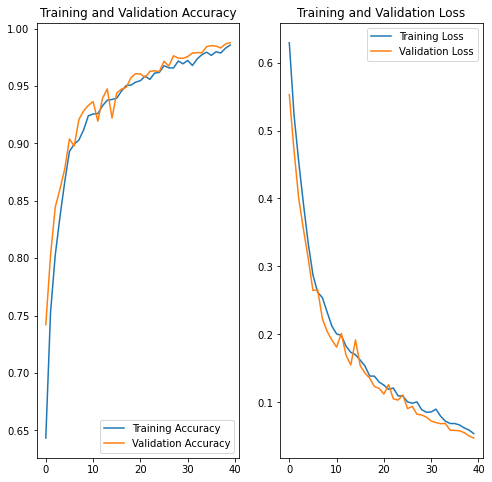

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
print(acc,val_acc,loss,val_loss)
epochs_range = range(40)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
#a = 'C://Users//LENOVO//Desktop//113566.jpg'
#img = load_img('C://Users//LENOVO//Desktop//113566.jpg', target_size=(64, 64))
#img = img_to_array(img)
#img = img.reshape(1, 64, 64, 3)
res = model.predict_generator(test_data)
res = np.round(res)
new_data=[]
count1=0
count2=0
for i in res:
    if(i==1.):
        new_data.append("Male")
        count1+=1
    else:
        new_data.append("Female")
        count2+=1
print("Male",count1)
print("Female",count2)
new_data

Male 35
Female 37


['Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male']

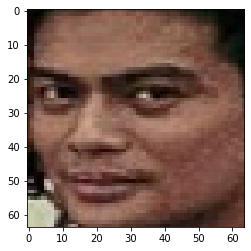

Male


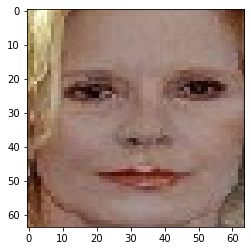

Male


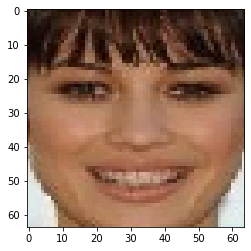

Female


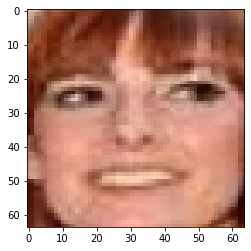

Female


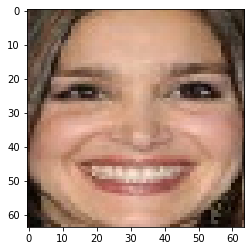

Female


In [18]:
x,y = test_data.next()
for i in range(0,5):
    res = np.round(res)
    image = x[i]
    plt.imshow(image)
    plt.show()
    print(new_data[i])


# for epoch 20

first : 66%

second: 81%

# for epoch 40

first : 89%

second : 87%

Third : 94.167%

In [82]:
model.save('Genderclassification/Prediction_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Genderclassification/Prediction_model\assets


In [85]:
ls Genderclassification

 Volume in drive C is Windows-SSD
 Volume Serial Number is 40E2-CF8A

 Directory of C:\Users\LENOVO\Genderclassification

30-10-2020  16:04    <DIR>          .
30-10-2020  16:04    <DIR>          ..
30-10-2020  16:04    <DIR>          Prediction_model
               0 File(s)              0 bytes
               3 Dir(s)  31,056,375,808 bytes free


In [89]:
new_model = keras.models.load_model('Genderclassification/Prediction_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0